<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Basics of Classification</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 480A5, Spring 2025
Instructor: Brian Munsky
Authors: Will Raymond, Zachary Fox, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Learning Objectives

Upon completion of this module, you will be able to:
* Describe **what** is **Classification** and **when**/**why** to use **Machine Learning** for it.
* Perform logistic regression
* Understand and explain at an introductory level some of the writing on machine learning **ethics** and best practices.

## Other Resources
Some relevant books (with available PDFs):
* [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), Christopher Bishop

* [Probabilistic Machine Learning](https://probml.github.io/pml-book/book1.html), Kevin Patrick Murphy

* [Data Modeling for the Sciences: Applications, Basics, Computations](https://www.amazon.com/Data-Modeling-Sciences-Applications-Computations/dp/1009098500/ref=sr_1_1?crid=3ACTTNI3IZ2SA&keywords=Steve+Presse+book&qid=1685627119&sprefix=steve+presse+boo%2Caps%2C317&sr=8-1), Steve Pressé and Ioannis Sgouralis.

Package imports

In [134]:
# New packages that we are going to use in this notebook.
# Uncomment the following lines to install the packages.
# %pip install torch
# %pip install scikit-learn
# %pip install tdqm
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. **Machine Learning Overview**

*(This introduction is identical to the one for Regression - Feel Free to skip ahead)*

In this notebook and lecture, we are going to look at some supervised machine learning basics. Let's start off with a definition:

Machine learning (ML) is a class of mathematics and algorithms that learn an arbitrary model (denoted as $\mathcal{M}$) from sample data (denoted as $\bar{X}$) in order to make some predicitons or decisions (denoted as $\bar{Y}$). ML models are usually found by minimizing a given loss function ($L$), which in many cases is related to maximizing some likelihood function. 

Sample data can be provided with or without explanatory labels, and the model to be learned is not explicitly programmed, hence the name "Machine Learning." Broadly, ML falls under the umbrella of Artificial Intelligence, although that field has other disciplines besides ML. 


<p align="center">  <img src="FiguresD/image.png"> </p>

In biomedical engineering, machine learning techniques are applied to analyze and interpret large datasets of biological and medical information, such as genetic data, medical images, or clinical records, to discover patterns, identify relationships, and assist in diagnosis, prognosis, and treatment planning.

There are lots of different types of Machine Learning, each with its own strengths and limitations.  We will only cover a few in this course, but I hope that you will explore more on your own.

## 1.A. **What are models, anyway?**

<p align="center">   <img src="FiguresD/image1.png"> </p>

### 1.A.1. **The cannonical machine learning equation (X -> M -> Y)**

In much of machine learning, we are faced with the challenge to  approximate some relationship:
$$\mathbf{X} \rightarrow \mathcal{M} \rightarrow \mathbf{Y}, $$
but you might wonder, what are these quantities $\mathbf{X}$, $\mathcal{M}$, and $\mathbf{Y}$?  That is a great question, because the real power of machine learning is that all three of these terms can mean a very large number of very different things for different problems, and yet the concepts and approaches to solve this problem can remain similar.  Let's define each in very general terms.

<p align="center">   <img src="FiguresD/images.001.png"> </p>


### 1.A.2. **"Input Features" ($\mathbf{X}$).**

The matrix $\bar{X}_i$ is your **input feature data**; this is a collection of data that you can obtain to quantify each particular $i^{\rm th}$ sample, event or experiment. This can take many shapes, forms and sizes. One of the most common is an unordered vector of some arbitrary features. For example, one could imagine a classifier algorithm that takes inputs about a patient's currenty symptoms and demographics (perhaps we want to predict a probability that this patient has diabetes or another disease). That input data may be formatted as such:

\begin{equation}
  \bar{X} = [ \text{Int : Age}, \text{Int : Urinations per day},  \text{Float : Liters drank per day}, \text{Bool : Peripheral Numbness}]
\end{equation}

An example entry for the $i^{\rm th}$ patient may be:
\begin{equation}
  \bar{X}_i = [ 27, 6, 1.5, True ]
\end{equation}

When we have data on a large number of different samples, we typically order these features into a matrix with one row for each sample:

$$\mathbf{X} =\left[ \begin{matrix} \bar{X}_0 \\ \bar{X}_1 \\ \vdots \\ \bar{X}_{N-1} \end{matrix}\right]$$

Ordered datasets can come in many shapes ranging from something like text (1xN vector where sequence is important) to full 3D color movies (XYZ coordinates by Color channel by number of frames). All of these can be represented by an arbitrary tensor of the correct shape by number of entries in your dataset.

\begin{equation}
  Shape(\mathbf{X}) = Nsamples \times Dim_1 \times Dim_2 ... Dim_N
\end{equation}

**The first step in any machine learning problem is always to look at the data**, so let's do that.

#### Python example of input matrix for diabetes data set.

The various features in the diabetes data base are: ['age', 'sex', 'bmi', 'bp', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
The shape of the input matrix is (442, 10)


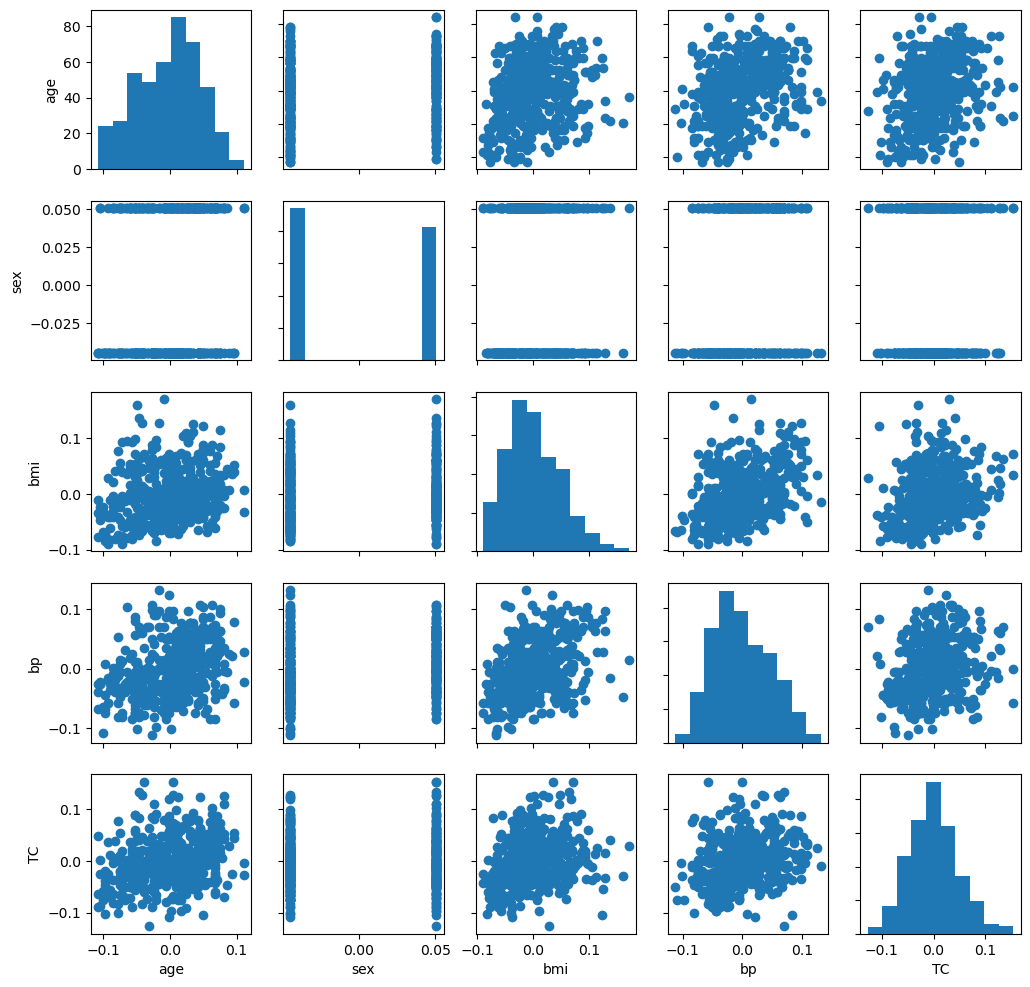

In [135]:
# Example of some input feature data for the diabetes dataset.
diabetes = datasets.load_diabetes()
dataDiabetes = diabetes.data

# Note the following features in the diabetes dataset:
    # age - age in years
    # sex - male or female
    # bmi - body mass index
    # bp - average blood pressure
    # s1 - TC: total serum cholesterol
    # s2 - LDL: low-density lipoproteins
    # s3 - HDL: high-density lipoproteins
    # s4 - TCH: total cholesterol / HDL
    # s5 - LTG: possibly log of serum triglycerides level
    # s6 - GLU: blood sugar level

# Let's update the data labels to be more descriptive.
diabetes.feature_names[4] = 'TC' # Total cholesterol
diabetes.feature_names[5] = 'LDL' # Low-density lipoproteins
diabetes.feature_names[6] = 'HDL' # High-density lipoproteins
diabetes.feature_names[7] = 'TCH' # Total cholesterol / HDL
diabetes.feature_names[8] = 'LTG' # Log of serum triglycerides level
diabetes.feature_names[9] = 'GLU' # Blood sugar level

print(f'The various features in the diabetes data base are: {diabetes.feature_names}')
print(f'The shape of the input matrix is {dataDiabetes.shape}')

# Let's plot the data to see how it looks like.
# We are going to plot a matrix of scatter plots to see how the data looks like.
# We are going to use the first 5 features in the diabetes dataset.
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
for i in range(5):
    for j in range(5):
        if i==j:
            ax[i, j].hist(dataDiabetes[:, i])
        else:
            ax[i, j].scatter(dataDiabetes[:, j], dataDiabetes[:, i])
        if j==0:
            ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
        if i==4:
            ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
plt.show()
# Note that the variables are all scaled somewhat arbitrarilly in this data set.
# Some are discrete (e.g., sex), some are continuous (e.g., age).

-----
### **1.A.3. Target Labels ($\mathbf{Y}$)**
![alt text](figuresD/images.002.png)


The vector or matrix $\bar{Y}_i$ is your **target data** or **label data**; this is the end result or classification that you are trying to obtain or predict to describe the sample, event, or experiment. This can too take many shapes, forms, and sizes, and it might not even exist at all.

If the above data has a corresponding label (e.g., a known fact such as a statement saying whether the entries in your data truly have diabetes), your dataset is said to be **labeled**, and you can use **Supervised** machine learning techniques. 

In other machine learning problems, $\bar{Y}_i$ may not be specified. In this case, when your dataset has an absence of labels, then any approaches are said to be **Unsupervised.**

For now, we will focus on supervised learning, and we will assume that $\bar{Y}_i$ is known.  

#### Python example of Target Vectors for Diabetes data set.

The shape of the target data is (442,)
[151.  75. 141. 206. 135.]
The shape of the target data is (442,)
[1. 0. 1. 1. 0.]


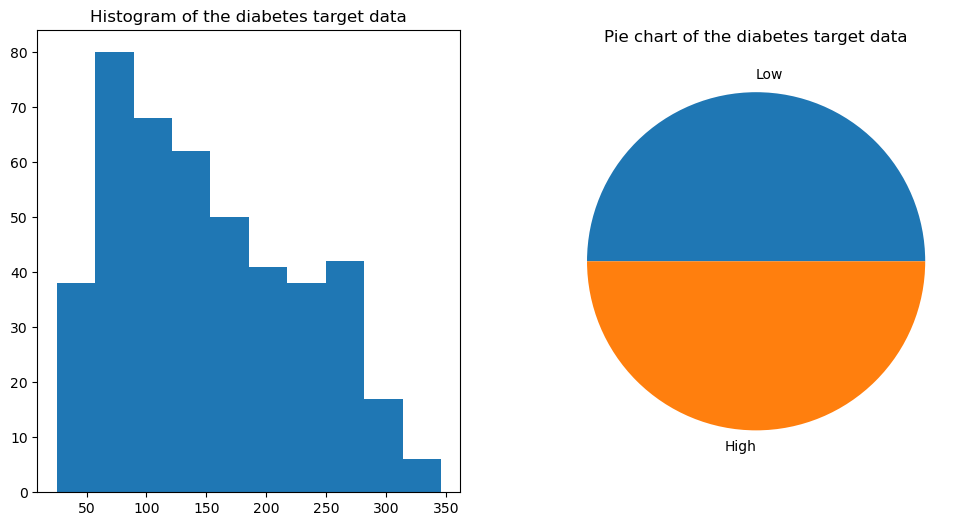

In [136]:
# Load the target data from the diabetes dataset.
# The target data is a quantitative measure of disease progression one year after baseline.
targetDiabetesRegression = diabetes.target
print(f'The shape of the target data is {targetDiabetesRegression.shape}')
print(targetDiabetesRegression[0:5])

# Let's also define a binary target variable for classification, where we 
# only need to classify the disease progression as high or low.
targetDiabClass = np.zeros(targetDiabetesRegression.shape)
targetDiabClass[targetDiabetesRegression > 140] = 1
print(f'The shape of the target data is {targetDiabClass.shape}')
print(targetDiabClass[0:5])

# Let's make a pair of figures to show the histogram of the data
# and a pie chart of the data classes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(targetDiabetesRegression)
ax[0].set_title('Histogram of the diabetes target data')
ax[1].pie([np.sum(targetDiabClass==0), np.sum(targetDiabClass==1)], labels=['Low', 'High'])
ax[1].set_title('Pie chart of the diabetes target data')
plt.show()

# Note that the data is pretty balanced, so we don't need to worry about class imbalance.

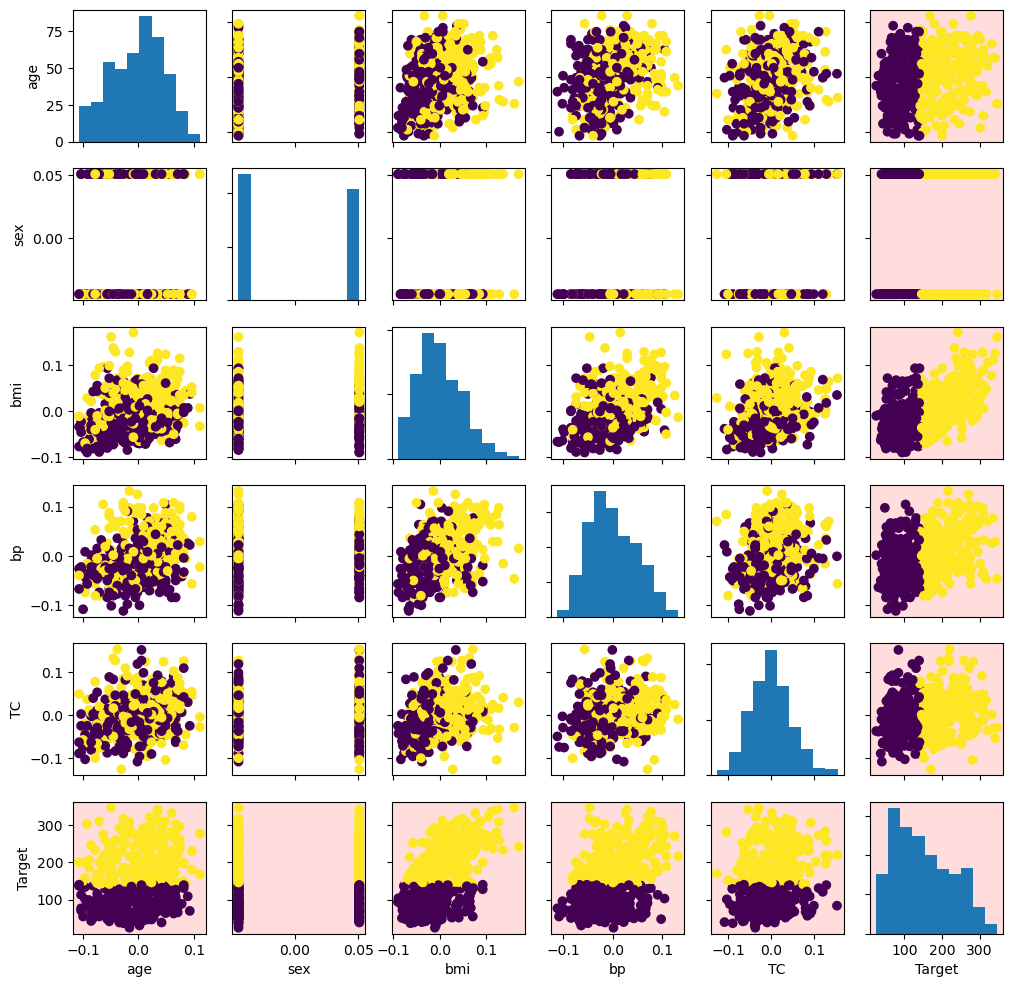

In [137]:
# Let's also replot our features against the target variable to see if we can see any patterns.
# For this, we are going to make a 6 x 6 matrix of scatter plots, with the features in the first 5 rows
# and the target variable in the last row.  We will also color the points according to the target variable.
fig, ax = plt.subplots(6, 6, figsize=(12, 12))
data_and_targets = np.hstack((dataDiabetes[:,:5], targetDiabetesRegression.reshape(-1, 1)))
for i in range(6):
    for j in range(6):
        if i==j:
            ax[i, j].hist(data_and_targets[:, i])
        else:
            ax[i, j].scatter(data_and_targets[:, j], data_and_targets[:, i], c=targetDiabClass)
        if j==0:
            if i==5:
                ax[i, j].set_ylabel('Target')
            else:
                ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
            if i==5:
                ax[i, j].set_facecolor('#FFDDDD')
        if i==5:
            ax[i, j].set_facecolor('#FFDDDD')
            if j==5:
                ax[i, j].set_xlabel('Target')
            else:
                ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
            if j==5:
                ax[i, j].set_facecolor('#FFDDDD')

# Can you see any patterns in the data?  What do you think would be the 
# best features to use for prediction?
# How would you turn code this inot a callable function for later use?

-----
### **1.A.4. The Model ($\mathcal{M}$)**
![alt text](FiguresD/images.003.png)


$\mathcal{M}$ in our definition is any arbitrary set of mathematical or logical operations that takes $\bar{X}_i$ as an input and then makes a guess for a corresponding $\bar{Y}_i$. 

There are **tons** of different models and algorithms used for fitting data, and we will try a few over the next couple lessons, but this is **extremely** general, and statisticians and computer scientists are developing new models every day!

## **1.B. Regression and Classification**
The two most common machine learning modeling tasks are **Regression** and **Classification**.  The difference comes from what kinds of targets we are trying to predict. When targets ($\bar{Y}$) are defined in advance and they take on continuous values (e.g., 2.345), we call this a **Regression** problem. Please see Notebook M3D to learn more about regression.  

When the targets take on discrete values (e.g., \{0,1,2\} or \{true,false\}, or \{cat, horse, dog\}), we call this a **Classification** problem.  The rest of this notebook will focus on Classification.



---------------
# **2. Classification Introduction**
---------------
Suppose that ${Y}$ is the target for our ML model (i.e, this is what we wish to learn a model to predict). If the set of possible labels $Y$ is the set of boolean labels (0,1), then we are setting up a model to solve a classification problem. For example, training a classifier to tell if a picture contains a cat or a dog, our dataset would look like $\bar{X}$ of shape $[N, X, Y, RGB]$ and $Y$ our labels would be shape $[N]$ with labels 0 for a cat or 1 for a dog (or vice versa). 

Let $p(\mathbf{x}) \equiv p(1|\mathbf{x})$ denote our model for the **probability** of predicting class $Y=1$ given our feature data $\mathbf{x}$. Ideally, we would like this to be as close to one as possible for the correct label ($\bar{Y}=1$) and as close to zero as possible for incorrect labels ($\bar{Y}=0$).

For a large number of samples, the probability that we would get a given classification task correct would be

\begin{equation}
P(y_i \text{ is correct}) = \left\{ \begin{matrix} p(\mathbf{x}_i) &\text{if }y_i=1 \\ 1-p(\mathbf{x}_i) &\text{if }y_i=0 \end{matrix}\right.,
\end{equation}
and the total **likelihood** that we would get all such pairs of features and targets ($\mathbf{x}_i,y_i$) assuming that the model is correct would be:
\begin{equation}
L = \prod_{y_i=1} p(\mathbf{x}_i)  \prod_{y_i=0} (1-p(\mathbf{x}_i)).
\end{equation}

By taking the logarithm of this probability, we arrive at:
\begin{equation}
\log L = \sum_{i=1}^N y_i \log p(\mathbf{x}_i) + (1-y_i)\log (1-p(\mathbf{x}_i)).
\end{equation}
We would like to find an appopriate function $p(\mathbf{x}_i)$ to maximize this probability, or equivalently minimize the negative average **binary cross entropy** (BCE), which is written:
\begin{equation}
BCE = -\log L = -\frac{1}{N} \sum_{i=1}^N \left( y_i \log(p(\mathbf{x}_i)) + (1-y_i) \log(1-p(\mathbf{x}_i))\right) 
\end{equation}

## **2.A. Maximizing the Binary Cross Entropy**

In our study of regression in the last notebook, we already learned how to predict a real valued number from a set of features using the formula $z = \mathbf{w}{x}$. It would be nice if we could re-use some of that effort.

Unfortunately, we know that the function $p(\mathbf{x})$ must return a probability, so its result must be a number between zero and one. To transform the problem into something that we already know how to do, we create a sigmoid function that maps all real valued numbers $z\in (-inf, inf)$ to the set $p\in(0,1)$ according to:

$$ p(z) = \frac{1}{1+\exp(-z)} $$ 

In this formulation, the real number $z$ is often known as the "logit".  Here is a plot of what it looks like.

![alt text](FiguresD/images.011.png)

With this transformation, we can now compute our **Loss Function**, $\mathcal{L} = BCE$ in terms of $z(\mathbf{x}) = \mathbf{w}\mathbf{x}$ as:

\begin{equation}
\mathcal{L} =  -\frac{1}{N} \sum_{i=1}^N \left( y_i \log\left(\frac{1}{1+\exp(-\mathbf{wx_i})}\right) + (1-y_i) \log\left(\frac{\exp(-\mathbf{wx_i})}{1+\exp(-\mathbf{wx_i})}\right)\right)
\end{equation}

Let's try this out in python:

## **2.B. Training, Validation and Testing**

![alt text](FiguresD/images.013.png)

### Python Example for Classification using Logistic Regression

In [138]:
# First, we will get our data and target data from the diabetes dataset.
# This code is copied from our previous regression notebook, except that we will
# now use the binary target variable for classification.

# Compute the number of features and number of data points.
numSamples, numFeatures = dataDiabetes.shape

# Let's start by splitting the data into a TRAINING and TESTING set.
# We will use 80% of the data for training and 20% for validation.
# Partition the data into training and test sets, using random selection.
np.random.seed(0)
indices = np.random.permutation(numSamples)
splitIndex = int(numSamples*0.8)
training_inds, test_inds = indices[:splitIndex], indices[splitIndex:]
trainingData, testData = dataDiabetes[training_inds,:], dataDiabetes[test_inds,:]
trainingTarget, testTarget = targetDiabClass[training_inds], targetDiabClass[test_inds]

# Now, let's find the weights according to our derived expression
weights = np.linalg.inv(trainingData.T @ trainingData) @ trainingData.T @ trainingTarget

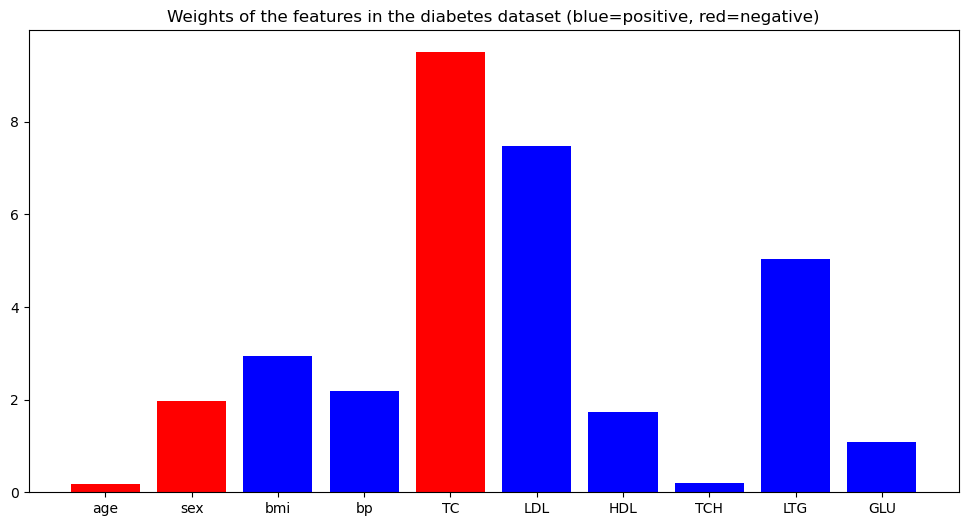

In [139]:
# Let's plot the weights to see which features are most important.  
# Plot positive weights in blue and negative weights in red.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(np.arange(numFeatures), abs(weights), color=['blue' if w > 0 else 'red' for w in weights])
ax.set_xticks(np.arange(numFeatures))
ax.set_xticklabels(diabetes.feature_names)
ax.set_title('Weights of the features in the diabetes dataset (blue=positive, red=negative)')
plt.show()

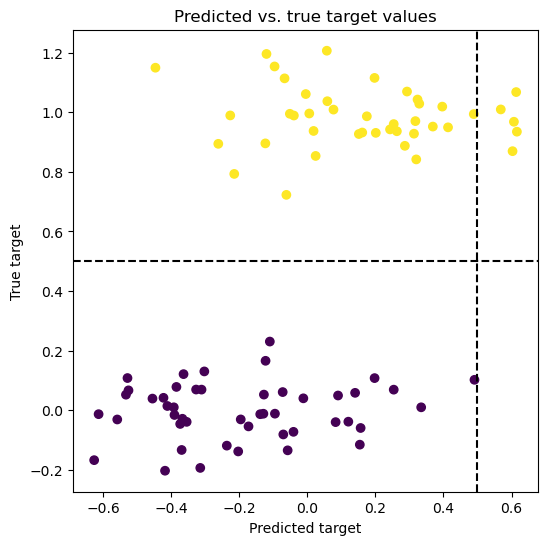

In [140]:
# Let's also plot the results to see how well we did.
# We will plot the prediction on the horizontal axis and the true target on the vertical axis.
# for better visualization we will add a little random noise to the true target values.
# We will also color the points according to the true target value.
predictedTarget = testData @ weights
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(predictedTarget, testTarget + np.random.normal(0, 0.1, testTarget.shape), c=testTarget)
# Add vertical line at 0.5 to show the decision boundary.
ax.axvline(0.5, color='black', linestyle='--')
# Add horizontal line at 0.5 to show the decision boundary.
ax.axhline(0.5, color='black', linestyle='--')

ax.set_xlabel('Predicted target')
ax.set_ylabel('True target')
ax.set_title('Predicted vs. true target values')
plt.show()

Yuck, that doesn't look very good.  Let's try to do better by adding a bias term and using logistic regression.

In [141]:
# Next we will add the bias term to our training and testing data 
X_biasTrain = np.hstack((np.ones((trainingData.shape[0], 1)), trainingData))
X_biasTest = np.hstack((np.ones((testData.shape[0], 1)), testData))

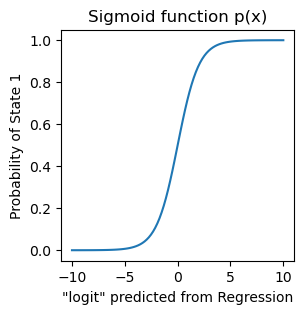

In [142]:
# Logistic regression
# Here we are going to demonstrate logistic regression on the diabetes data set.
# We will use the binary target variable for classification, where we
# only need to classify the disease progression as high or low.

# First, let's define the sigmoid function that maps from the real numbers (-inf,inf) to the interval [0,1].
# This is necessary to map the output of the linear regression to a probability.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Let's plot the sigmoid function to see how it looks like.
x = np.linspace(-10, 10, 100)
p = sigmoid(x)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(x, p)
ax.set_title('Sigmoid function p(x)')
ax.set_xlabel('"logit" predicted from Regression')
ax.set_ylabel('Probability of State 1')
plt.show()

In [143]:
# Now, let's define the loss function for logistic regression. This is the cross-entropy loss function,
# which is a measure of how well the predicted probabilities match the true labels (i.e., the likelihood 
# of the data given the model parameters)
def logistic_loss(weights, X, y, lam):
    # Compute the predicted probabilities using the sigmoid function.
    probs = sigmoid(X @ weights)
    # Compute the loss using the cross-entropy loss function.
    loss = -np.mean(y * np.log(probs) + (1 - y) * np.log(1 - probs)) + lam * np.sum(weights**2)
    return loss

In [144]:
# Now, let's define the GRADIENT of the loss function for logistic regression. This
# is the derivative of the loss function with respect to the weights, which is used to
# update the weights using gradient descent maximization of the likelihood of the data.
def logistic_gradient(weights, X, y, lam):
    # Compute the predicted probabilities using the sigmoid function.
    probs = sigmoid(X @ weights)
    # Compute the gradient of the loss function with respect to the weights.
    grad = X.T @ (probs - y) / X.shape[0] + 2 * lam * weights
    return grad

In [145]:
# Now, let's define a function to perform GRADIENT DESCENT for logistic regression. This
# function will take the input data, target data, regularization parameter, learning rate, and
# number of iterations as input, and return the weights and the loss at each iteration.
def gradient_descent_logistic(X, y, lam, learning_rate, num_iters, save_losses=False):
    # Initialize the weights to zero.
    weights = np.zeros(X.shape[1])
    # Create a list to store the loss at each iteration.
    losses = []
    # Perform gradient descent for a given number of iterations.
    for i in range(num_iters):
        # Compute the loss and gradient.
        loss = logistic_loss(weights, X, y, lam)
        grad = logistic_gradient(weights, X, y, lam)
        # Update the weights using the gradient and the learning rate.
        weights -= learning_rate * grad
        # Store the loss if the function is called with the save_losses argument.
        if save_losses:           
            losses.append(loss)
    return weights, losses

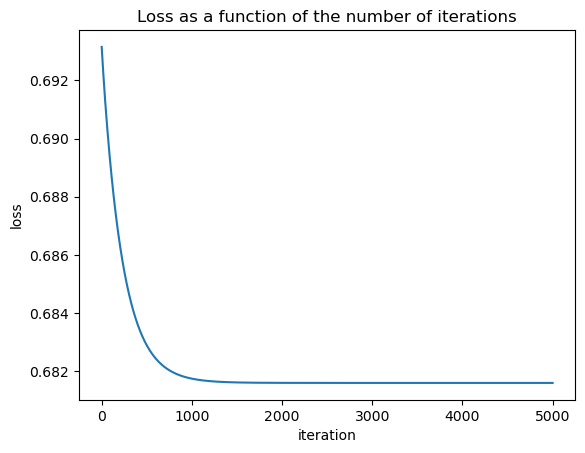

In [146]:
# Now, let's perform gradient descent to find the weights for logistic regression, and 
# plot the test accuracy as a funtion of the regularization parameter.
learning_rate = 0.1
num_iters = 5000
all_accuracy = []

# Let's run our code for a given choice of lambda
lamb = 0.01
weights, losses = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], lamb, 
                                            learning_rate, num_iters, save_losses=True)

# Now, let's plot the loss as a function of the number of iterations to check for convergence.
f,ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.set_title('Loss as a function of the number of iterations')
plt.show()

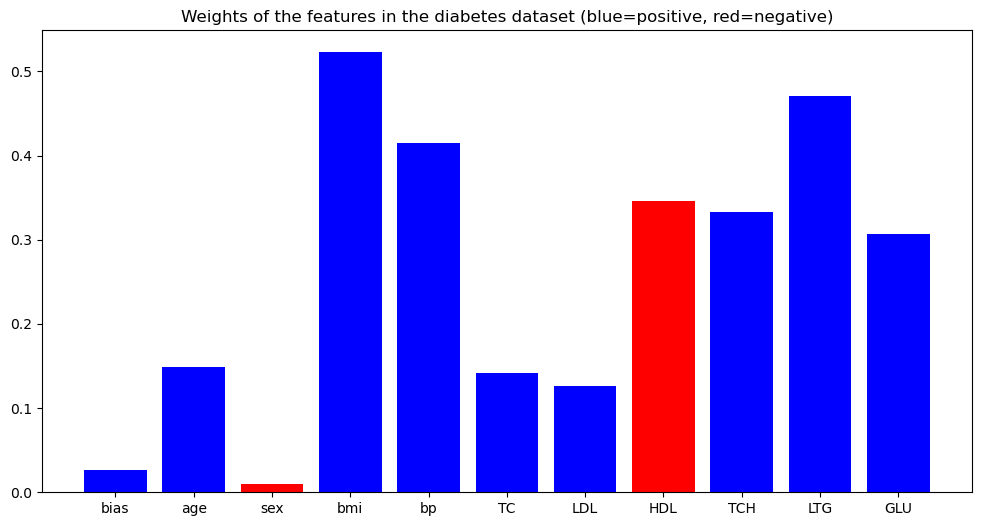

In [147]:
# Let's plot the weights to see which features are most important.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(np.arange(numFeatures+1), abs(weights), color=['blue' if w > 0 else 'red' for w in weights])
ax.set_xticks(np.arange(numFeatures+1))
ax.set_xticklabels(['bias'] + diabetes.feature_names)
ax.set_title('Weights of the features in the diabetes dataset (blue=positive, red=negative)')
plt.show()

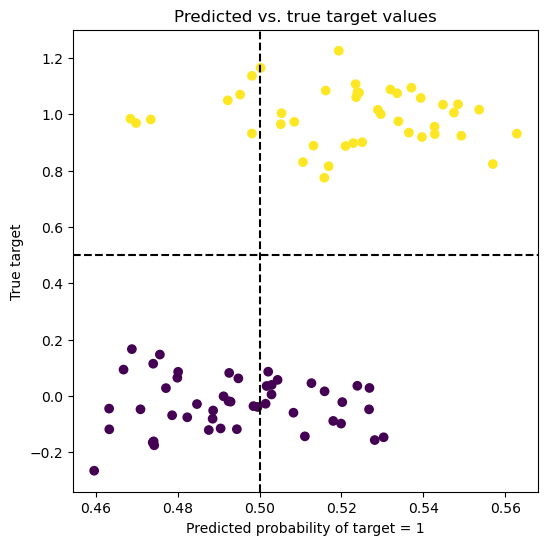

In [148]:
# Let's also plot the results to see how well we did.
# We will plot the prediction on the horizontal axis and the true target on the vertical axis.
# for better visualization we will add a little random noise to the true target values.
# We will also color the points according to the true target value.
predictedTarget = sigmoid(X_biasTest @ weights)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(predictedTarget, testTarget + np.random.normal(0, 0.1, testTarget.shape), c=testTarget)
# Add vertical line at 0.5 to show the decision boundary.
ax.axvline(0.5, color='black', linestyle='--')
# Add horizontal line at 0.5 to show the decision boundary.
ax.axhline(0.5, color='black', linestyle='--')

ax.set_xlabel('Predicted probability of target = 1')
ax.set_ylabel('True target')
ax.set_title('Predicted vs. true target values')
plt.show()

In [149]:
# Now let's try again for many different values of lambda
# Please note -- we SHOULD split the data into training and validation sets to do this properly.

lambs = np.logspace(-4,-1,50)
all_accuracy = []
for lamb in lambs:
    weights = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], lamb, 
                                        learning_rate, num_iters)[0]

    # Now, let's use the weights to predict the target data.
    predTargetCustom = sigmoid(X_biasTest @ weights)

    # Now, let's make a classification decision based on the predicted probabilities.
    predTargetCustom = predTargetCustom >= 0.5

    # Let's compute the accuracy of the classification.
    all_accuracy.append(np.mean(predTargetCustom == targetDiabClass[test_inds]))

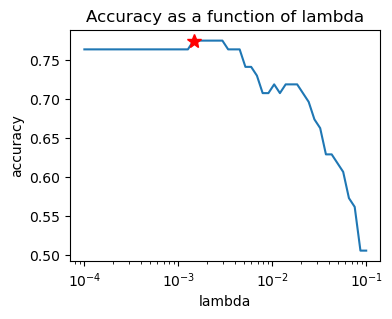

The best lambda is 0.0014563484775012444


In [150]:
# Now, let's plot the accuracy as a function of the regularization parameter.
f,ax = plt.subplots(figsize=(4,3))
ax.plot(lambs, all_accuracy)
# add a star to the plot denoting the best lambda
ax.plot(lambs[np.argmax(all_accuracy)], np.max(all_accuracy), 'r*', markersize=10)
ax.set_xlabel('lambda'); ax.set_ylabel('accuracy')
ax.set_xscale('log')
ax.set_title('Accuracy as a function of lambda')
plt.show()

# Let's find the best lambda
best_lambda = lambs[np.argmax(all_accuracy)]
print(f'The best lambda is {best_lambda}')

In [151]:
# Now, let's use the best lambda to find the weights for logistic regression.
weights = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], best_lambda, learning_rate, num_iters)[0]

# Now, let's use the weights to predict the target data.
predProbTargetCustom = sigmoid(X_biasTest @ weights)
predTargetCustom = predProbTargetCustom >= 0.5

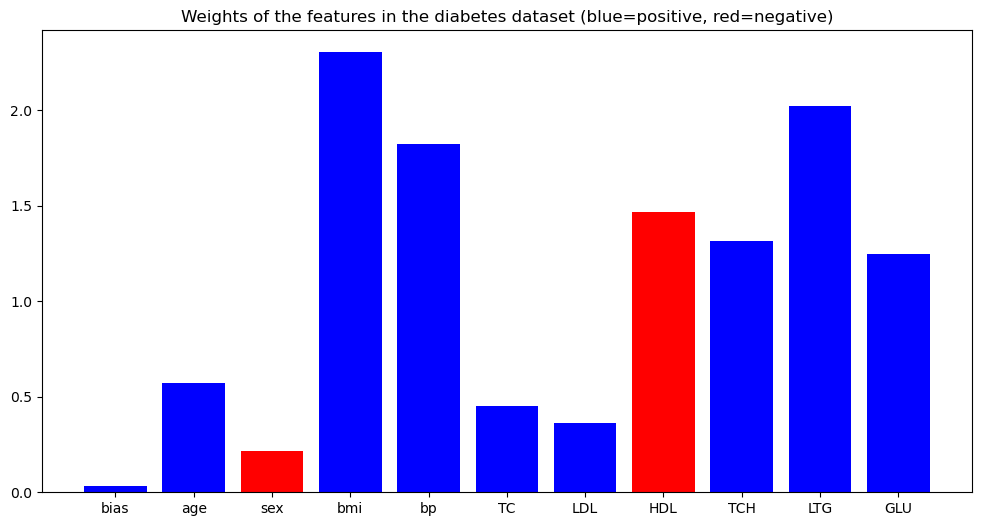

In [152]:
# Let's plot the weights again to see which features are most important.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(np.arange(numFeatures+1), abs(weights), color=['blue' if w > 0 else 'red' for w in weights])
ax.set_xticks(np.arange(numFeatures+1))
ax.set_xticklabels(['bias'] + diabetes.feature_names)
ax.set_title('Weights of the features in the diabetes dataset (blue=positive, red=negative)')
plt.show()


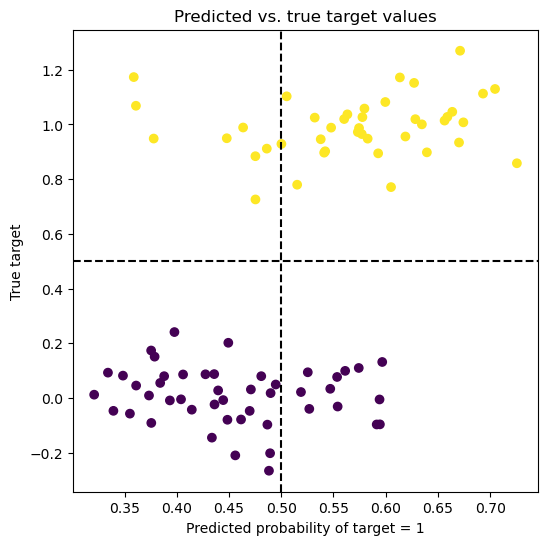

In [153]:
# Let's also plot the results to see how well we did.
# We will plot the prediction on the horizontal axis and the true target on the vertical axis.
# for better visualization we will add a little random noise to the true target values.
# We will also color the points according to the true target value.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(predProbTargetCustom, testTarget + np.random.normal(0, 0.1, testTarget.shape), c=testTarget)
# Add vertical line at 0.5 to show the decision boundary.
ax.axvline(0.5, color='black', linestyle='--')
# Add horizontal line at 0.5 to show the decision boundary.
ax.axhline(0.5, color='black', linestyle='--')

ax.set_xlabel('Predicted probability of target = 1')
ax.set_ylabel('True target')
ax.set_title('Predicted vs. true target values')
plt.show()

## 2.C. **Quantifying the Performance of a Classifier**

So, how did we do?  And how can we **quantify** how well we did?

### **2.C.1. Accuracy, Precision, Recall, and F1 Score**

![alt text](FiguresD/images.016.png)

In [154]:

# Let's compute the accuracy of the classification.
accuracyCustom = np.mean(predTargetCustom == targetDiabClass[test_inds])
print(f'The accuracy of our optimized custom classifier is {accuracyCustom}')

# Compute precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(targetDiabClass[test_inds], predTargetCustom)
print(f'The precision of our optimized custom classifier is {precision[1]}')
print(f'The recall of our optimized custom classifier is {recall[1]}')
print(f'The F1 score of our optimized custom classifier is {f1[1]}')

The accuracy of our optimized custom classifier is 0.7752808988764045
The precision of our optimized custom classifier is 0.7391304347826086
The recall of our optimized custom classifier is 0.8095238095238095
The F1 score of our optimized custom classifier is 0.7727272727272727


In [155]:
# Now, let's use the built-in logistic regression function from scikit-learn.
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2', C=1/best_lambda, max_iter=num_iters, solver='saga')
logisticRegr.fit(X_biasTrain, targetDiabClass[training_inds])
predProbTargetBuiltIn = logisticRegr.predict_proba(X_biasTest)[:,1]
predTargetBuiltIn = logisticRegr.predict(X_biasTest)

# Let's compute the accuracy of the classification.
accuracyBuiltIn = np.mean(predTargetBuiltIn == targetDiabClass[test_inds])
print(f'The accuracy of the built-in classifier is {accuracyBuiltIn}')

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(targetDiabClass[test_inds], predTargetBuiltIn)
print(f'The precision of the built-in classifier is {precision[1]}')
print(f'The recall of the built-in classifier is {recall[1]}')
print(f'The F1 score of the built-in classifier is {f1[1]}')

The accuracy of the built-in classifier is 0.7865168539325843
The precision of the built-in classifier is 0.7674418604651163
The recall of the built-in classifier is 0.7857142857142857
The F1 score of the built-in classifier is 0.7764705882352941


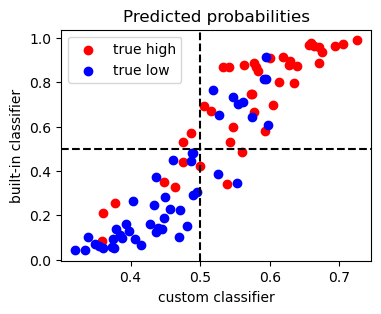

In [156]:
# Let's compare the probabilities predicted by our custom classifier and the built-in classifier.
probsCustom = sigmoid(X_biasTest @ weights)
probsBuiltIn = logisticRegr.predict_proba(X_biasTest)[:,1]

f,ax = plt.subplots(figsize=(4,3))
# Plot the predicted probabilities.  Use red for the true high values and blue for the true low values.
ax.scatter(predProbTargetCustom[targetDiabClass[test_inds]==1], predProbTargetBuiltIn[targetDiabClass[test_inds]==1], color='r', label='true high')
ax.scatter(predProbTargetCustom[targetDiabClass[test_inds]==0], predProbTargetBuiltIn[targetDiabClass[test_inds]==0], color='b', label='true low')
ax.set_xlabel('custom classifier'); ax.set_ylabel('built-in classifier')
ax.set_title('Predicted probabilities')
#Put lines at 0.5 on both axes
ax.axvline(0.5, color='k', linestyle='--')
ax.axhline(0.5, color='k', linestyle='--')
ax.legend()
plt.show()

![alt text](FiguresD/images.017.png)
### **2.C.2 Confusion Matrix**

Balanced Accuracy vs. Unbalanced Metrics

While a balanced accuracy in general is a good call, specific applications may call for different so-called unbalanced metrics. Consider the following scenario:


> You are designing an antigen test for a disease like Sars-Cov-2. Would you rather have a balanced false positive and false negative rate? Or would you rather emphasize minimizing as many false negatives as possible? The consequences for a false positive are a person quarantines for some period of time or takes subsequent tests, whereas the consequences for a false negative is a person with an infectious disease not quarantining.

The reverse situation may also happen:

> Imagine a diagnostic test where the treatment from a positive diagnostic is intensive or dangerous. One would want to minimize the false positive rate as much as possible to avoid unnecessary treatments to healthy people.


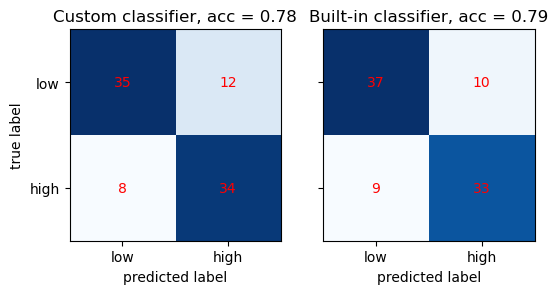

In [157]:
# Let's make confusion matrices for our custom classifier and the built-in classifier.
from sklearn.metrics import confusion_matrix
confusionCustom = confusion_matrix(targetDiabClass[test_inds],
                                      predTargetCustom)
confusionBuiltIn = confusion_matrix(targetDiabClass[test_inds],
                                        predTargetBuiltIn)

f,ax = plt.subplots(1,2,figsize=(6,3))
# Plot the confusion matrices.
ax[0].imshow(confusionCustom, cmap='Blues', interpolation='nearest')
ax[0].set_title('Custom classifier, acc = %.2f' % accuracyCustom)
ax[0].set_xlabel('predicted label')
ax[0].set_ylabel('true label')
ax[0].set_xticks([0,1]); ax[0].set_yticks([0,1])
ax[0].set_xticklabels(['low','high']); ax[0].set_yticklabels(['low','high'])
# add numbers to the plot
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, confusionCustom[i, j], ha='center', va='center', color='r')

ax[1].imshow(confusionBuiltIn, cmap='Blues', interpolation='nearest')
ax[1].set_title('Built-in classifier, acc = %.2f' % accuracyBuiltIn)
ax[1].set_xlabel('predicted label')
ax[1].set_xticks([0,1]); ax[1].set_yticks([0,1])
ax[1].set_xticklabels(['low','high']); ax[1].set_yticklabels(['',''])
for i in range(2):
    for j in range(2):
        ax[1].text(j, i, confusionBuiltIn[i, j], ha='center', va='center', color='r')
plt.show()
                            

### **2.C.3. Other Metrics**
![alt text](FiguresD/images.018.png)

#### **Receiver Operator Characteristic (ROC curve)**

Receiver Operator Characteristic Curves are constructed by plotting True Positive rate (TP / Total P) vs. False Positive Rate (FP / Total P).

An ROC is constructed by setting a stricter and stricter threshold for what is considered a positive label, starting from > 0.5 to > 0.999.

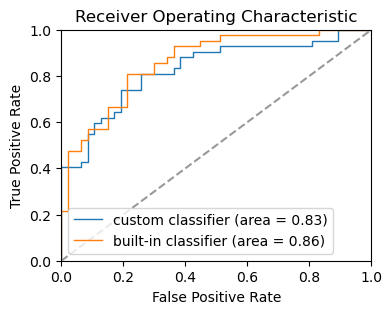

In [158]:
# Draw the ROC curve for our custom classifier and the built-in classifier.
from sklearn.metrics import roc_curve, auc
f,ax = plt.subplots(figsize=(4,3))
# Compute the ROC curve for our custom classifier.
fpr, tpr, thresholds = roc_curve(targetDiabClass[test_inds], probsCustom)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=1, label='custom classifier (area = %0.2f)' % (roc_auc))
# Compute the ROC curve for the built-in classifier.
fpr, tpr, thresholds = roc_curve(targetDiabClass[test_inds], probsBuiltIn)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=1, label='built-in classifier (area = %0.2f)' % (roc_auc))
# Plot a diagonal line to represent random guessing.
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()
plt.show()

# **4. Machine Learning Classifiers**

## **4.A. Using PyTorch Logistic Regression**

In [159]:
# Now let's build a more modern classifier using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Reshape the target data to be a n_samples x 1 matrix. This is required by PyTorch.
# trainingTarget = targetDiabClass[training_inds].reshape(-1, 1)
# testTarget = targetDiabClass[test_inds].reshape(-1, 1)
trainingTarget = targetDiabClass[training_inds].flatten()
testTarget = targetDiabClass[test_inds].flatten()

# First, let's convert our data to PyTorch tensors.
X_train = torch.tensor(X_biasTrain, dtype=torch.float32)
y_train = torch.tensor(trainingTarget, dtype=torch.float32)
X_test = torch.tensor(X_biasTest, dtype=torch.float32)
y_test = torch.tensor(testTarget, dtype=torch.float32)

In [160]:
# Now, let's define a simple neural network model for logistic regression.
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [161]:
# Now, let's define a function to train the model using gradient descent.
def train_model(model, X, y, lam, learning_rate, num_iters):
    # Define the loss function and optimizer.
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lam)
    # Train the model for a given number of iterations.
    for i in range(num_iters):
        # Forward pass: Compute predicted y by passing x to the model.
        y_pred = model(X).squeeze()
        # Compute the loss.
        loss = criterion(y_pred, y)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model

In [162]:
# Now, let's train the model using the training data.
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)

In [163]:
model = train_model(model, X_train, y_train, best_lambda, learning_rate, num_iters)

# Now, let's use the trained model to predict the target data.
predProbsTargetPytorchLR = model(X_test).squeeze()
predTargetPytorchLR = predProbsTargetPytorchLR >= 0.5

# Let's compute the accuracy of the classification.
accuracyPytorchLR = torch.mean((predTargetPytorchLR == y_test).float())
print(f'The accuracy of our PyTorch logistic regression classifier is {accuracyPytorchLR}')

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predTargetPytorchLR)
print(f'The precision of our PyTorch logistic regression classifier is {precision[1]}')
print(f'The recall of our PyTorch logistic regression classifier is {recall[1]}')
print(f'The F1 score of our PyTorch logistic regression classifier is {f1[1]}')

The accuracy of our PyTorch logistic regression classifier is 0.7640449404716492
The precision of our PyTorch logistic regression classifier is 0.7333333333333333
The recall of our PyTorch logistic regression classifier is 0.7857142857142857
The F1 score of our PyTorch logistic regression classifier is 0.7586206896551724


Text(0.5, 1.0, 'PyTorch (acc = 0.76)')

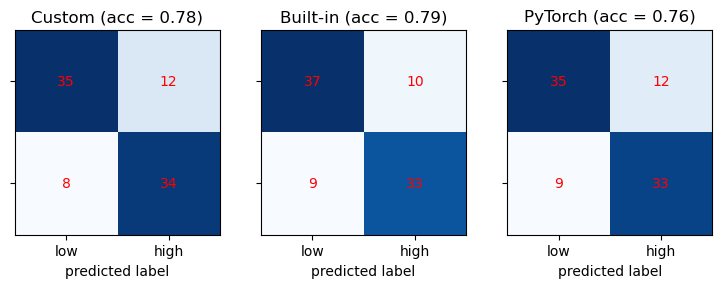

In [164]:
# Lets add a confusion matrix and compare the results with the previous classifiers
confusionPyTorch = confusion_matrix(y_test, predTargetPytorchLR)

f,ax = plt.subplots(1,3,figsize=(9,3))
for i, model in enumerate([confusionCustom, confusionBuiltIn, confusionPyTorch]):
    ax[i].imshow(model, cmap='Blues', interpolation='nearest')
    ax[i].set_xlabel('predicted label')
    ax[i].set_xticks([0,1]); ax[i].set_yticks([0,1])
    ax[i].set_xticklabels(['low','high']); ax[i].set_yticklabels(['',''])
    for j in range(2):
        for k in range(2):
            ax[i].text(k, j, model[j, k], ha='center', va='center', color='r')
ax[0].set_title('Custom' + f' (acc = {accuracyCustom:.2f})')
ax[1].set_title('Built-in' + f' (acc = {accuracyBuiltIn:.2f})')
ax[2].set_title('PyTorch' + f' (acc = {accuracyPytorchLR:.2f})')

## 4.B. **Using PyTorch Neural Networks**

In [165]:
# Now, let's try a more complex model, with a couple of hidden layers.
input_size = X_biasTrain.shape[1]
hidden_size = [10, 5]
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], output_size)
        self.layerSkip = nn.Linear(input_size, 1)
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        # out = self.layerSkip(x)
        out = self.layer1(x)
        # out = self.lrelu(out)
        out = self.layer2(out)
        # out = self.lrelu(out)
        out = self.layer3(out)
        out = torch.sigmoid(out)
        return out
    
# trainingTarget = targetDiabClass[training_inds].flatten()
# testTarget = targetDiabClass[test_inds].flatten()
# # First, let's convert our data to PyTorch tensors.
# X_train = torch.tensor(X_biasTrain, dtype=torch.float32)
# y_train = torch.tensor(trainingTarget, dtype=torch.float32)
# X_test = torch.tensor(X_biasTest, dtype=torch.float32)
# y_test = torch.tensor(testTarget, dtype=torch.float32)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [166]:
# Now, let's load the training data into our model and set up our objectives.
input_dim = X_train.shape[1]
modelComplex = NeuralNet(input_size, hidden_size, output_size)

criterionComplex = nn.BCELoss()
optimizerComplex = optim.SGD(modelComplex.parameters(), lr=0.001, weight_decay=0.001)

trainData = TensorDataset(X_train, y_train)
trainLoader = DataLoader(trainData, batch_size=10, shuffle=True)

100%|██████████| 1000/1000 [00:25<00:00, 38.74it/s]


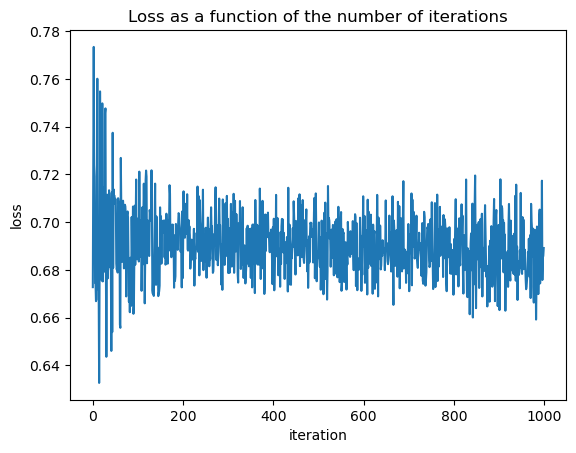

In [167]:
# Train the model for a given number of iterations.
epochs = 1000
losses = []
for epoch in tqdm(range(epochs)):
    for X_batch, y_batch in trainLoader:
        # Forward pass: Compute predicted y by passing x to the model.
        y_pred = modelComplex(X_batch).squeeze()
        # Compute the loss.
        loss = criterionComplex(y_pred, y_batch)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizerComplex.zero_grad()
        loss.backward()
        optimizerComplex.step()
    losses.append(loss.item())

# Plot the loss as a function of the number of iterations to check for convergence.
f,ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.set_title('Loss as a function of the number of iterations')
plt.show()

# You might need to run this multiple times to get a good result. 
# You are looking for a loss function to reach a minimum. If it is 
# still decreasing, you need to run it for more epochs.

In [168]:
# Now, let's use the trained model to predict the target data.
predProbsTargetPytorchNN = modelComplex(X_test).squeeze()
predTargetPytorchNN = predProbsTargetPytorchNN >= 0.5

# Let's compute the accuracy of the classification.
accuracyPytorchNN = torch.mean((predTargetPytorchNN == y_test).float())
print(f'The accuracy of our PyTorch classifier is {accuracyPytorchNN}')

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predTargetPytorchNN)
print(f'The precision of our PyTorch classifier is {precision[1]}')
print(f'The recall of our PyTorch classifier is {recall[1]}')
print(f'The F1 score of our PyTorch classifier is {f1[1]}')

The accuracy of our PyTorch classifier is 0.6292135119438171
The precision of our PyTorch classifier is 0.5652173913043478
The recall of our PyTorch classifier is 0.9285714285714286
The F1 score of our PyTorch classifier is 0.7027027027027027


## 4.C. **Using Scikit Learn Random Forests**

A common classifyer is the **decision tree**.  A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

The **Random Forest Classifier** expands on this idea by creating many decision trees and averaging their results.  This can help to prevent overfitting and improve the accuracy of the model.  This concept of using many models to improve the accuracy of the model is called **ensemble learning**.

Let's try this out in python using the **RandomForestClassifier** from the **sklearn** package.

In [169]:
# Now let's try a Random Forest Classifier from scikitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier
rf = RandomForestClassifier()

# Set up the grid search
param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10, 20]}
grid = GridSearchCV(rf, param_grid, cv=5)

In [170]:
# Fit the grid search to the data
grid.fit(X_biasTrain, targetDiabClass[training_inds])

# Print the best parameters
print(f'The best parameters are {grid.best_params_}')

# Now, let's use the best parameters to train the random forest classifier.
rf = RandomForestClassifier(n_estimators=1000, max_depth=5)
rf.fit(X_biasTrain, targetDiabClass[training_inds])

The best parameters are {'max_depth': 20, 'n_estimators': 10}


RandomForestClassifier(max_depth=5, n_estimators=1000)

The accuracy of our random forest classifier is 0.7640449438202247


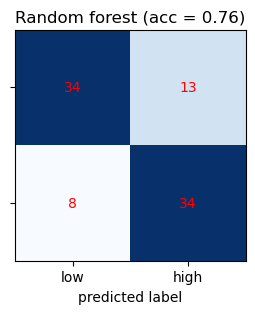

The precision of our random forest classifier is 0.723404255319149
The recall of our random forest classifier is 0.8095238095238095
The F1 score of our random forest classifier is 0.7640449438202247


In [171]:
# predict probabilities of the target data
predProbsTargetSKLearnRF = rf.predict_proba(X_biasTest)[:,1]

# Now, let's use the trained model to predict the target data.
predTargetSKLearnRF = rf.predict(X_biasTest)

# Let's compute the accuracy of the classification.
accuracySKLearnRF = np.mean(predTargetSKLearnRF == targetDiabClass[test_inds])
print(f'The accuracy of our random forest classifier is {accuracySKLearnRF}')

# Let's make a confusion matrix for the random forest classifier.
confusionRF = confusion_matrix(targetDiabClass[test_inds],
                                    predTargetSKLearnRF)

# Plot the confusion matrix.
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(confusionRF, cmap='Blues', interpolation='nearest')
ax.set_xlabel('predicted label')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['low','high']); ax.set_yticklabels(['',''])
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionRF[i, j], ha='center', va='center', color='r')
ax.set_title('Random forest' + f' (acc = {accuracySKLearnRF:.2f})')
plt.show()

# Comute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(targetDiabClass[test_inds], predTargetSKLearnRF)
print(f'The precision of our random forest classifier is {precision[1]}')
print(f'The recall of our random forest classifier is {recall[1]}')
print(f'The F1 score of our random forest classifier is {f1[1]}')


## **4.D. Using Scikit Learn Support Vector Machines**

**Support Vector Machines** (SVM) are a set of supervised learning methods used for classification, regression and outliers detection. The idea behind the SVM is to find the **hyperplane** that best separates the classes in the feature space. The hyperplane is the decision boundary that maximizes the margin between the classes. The margin is the distance between the hyperplane and the nearest data point from either class. The SVM algorithm then classifies new data points based on which side of the hyperplane they fall. 

The SVM can be used for both linear and non-linear classification. In linear classification, the SVM finds the hyperplane that best separates the classes. In non-linear classification, the SVM uses the kernel trick to transform the data into a higher-dimensional space where it can be separated by a hyperplane.

Let's try this out in python using the **SVC** from the **sklearn** package.

In [172]:
# Let's try a support vector machine from scikitlearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a support vector classifier
svc = SVC(probability=True)

# Set up the grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search to the data
grid.fit(X_biasTrain, targetDiabClass[training_inds])

# Print the best parameters
print(f'The best parameters are {grid.best_params_}')

# Now, let's use the best parameters to train the support vector classifier.
svc = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], probability=True)
svc.fit(X_biasTrain, targetDiabClass[training_inds])

The best parameters are {'C': 10, 'gamma': 1}


SVC(C=10, gamma=1, probability=True)

The accuracy of our support vector machine classifier is 0.7752808988764045


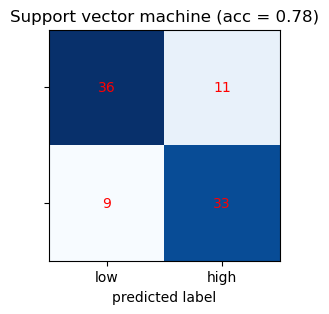

The precision of our support vector machine classifier is 0.75
The recall of our support vector machine classifier is 0.7857142857142857
The F1 score of our support vector machine classifier is 0.7674418604651163


In [173]:
# predict probabilities of the target data
predProbsTargetSKLearnSVM = svc.predict_proba(X_biasTest)[:,1]

# Now, let's use the trained model to predict the target data.
predTargetSKLearnSVM = svc.predict(X_biasTest)

# Let's compute the accuracy of the classification.
accuracySVM = np.mean(predTargetSKLearnSVM == targetDiabClass[test_inds])
print(f'The accuracy of our support vector machine classifier is {accuracySVM}')

# Let's make a confusion matrix for the support vector machine classifier.
confusionSVM = confusion_matrix(targetDiabClass[test_inds],
                                    predTargetSKLearnSVM)

# Plot the confusion matrix.
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(confusionSVM, cmap='Blues', interpolation='nearest')
ax.set_xlabel('predicted label')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['low','high']); ax.set_yticklabels(['',''])
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionSVM[i, j], ha='center', va='center', color='r')

ax.set_title('Support vector machine' + f' (acc = {accuracySVM:.2f})')
plt.show()

# Comute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(targetDiabClass[test_inds], predTargetSKLearnSVM)
print(f'The precision of our support vector machine classifier is {precision[1]}')
print(f'The recall of our support vector machine classifier is {recall[1]}')
print(f'The F1 score of our support vector machine classifier is {f1[1]}')

In [174]:
# Finally, let's try to create a consensus classifier that combines the predictions of the previous classifiers.
# We will use a simple majority vote to make the final prediction.

predTargetConsensus = (predProbsTargetSKLearnSVM + predProbsTargetSKLearnRF + \
                        (predProbsTargetPytorchNN + predProbsTargetPytorchLR).detach().numpy() + \
                        predProbTargetBuiltIn + predProbTargetCustom)/6
predTargetConsensus = predTargetConsensus >= 0.5

# Let's compute the accuracy of the classification.
accuracyConsensus = np.mean(predTargetConsensus == targetDiabClass[test_inds])
print(f'The accuracy of our consensus classifier is {accuracyConsensus}')

# Let's make a confusion matrix for the consensus classifier.
confusionConsensus = confusion_matrix(targetDiabClass[test_inds],
                                    predTargetConsensus)

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(targetDiabClass[test_inds], predTargetConsensus)
print(f'The precision of our consensus classifier is {precision[1]}')
print(f'The recall of our consensus classifier is {recall[1]}')
print(f'The F1 score of our consensus classifier is {f1[1]}')

The accuracy of our consensus classifier is 0.7752808988764045
The precision of our consensus classifier is 0.75
The recall of our consensus classifier is 0.7857142857142857
The F1 score of our consensus classifier is 0.7674418604651163


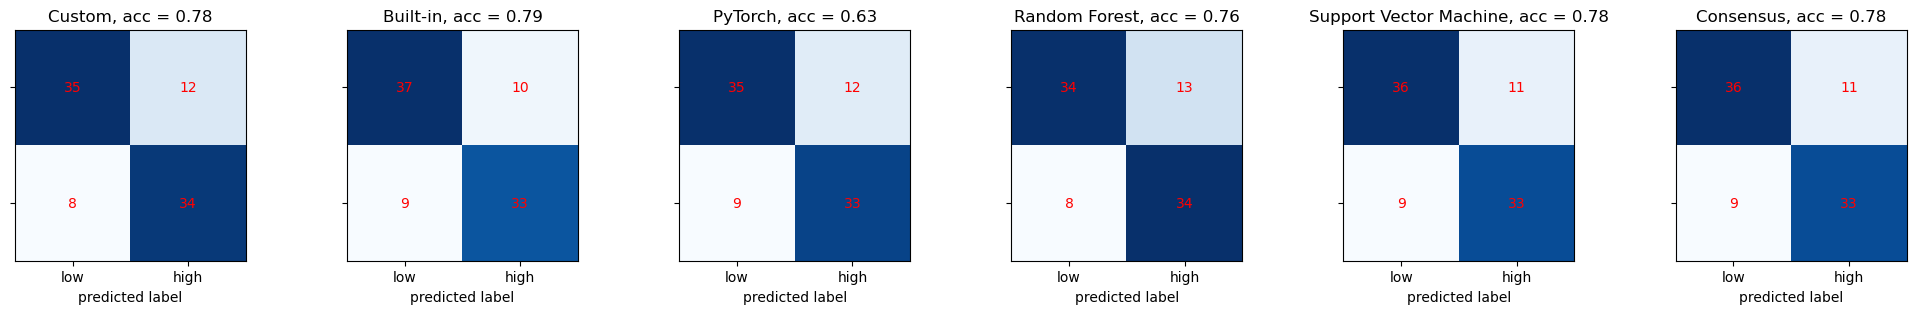

In [175]:
# Now let's compare the confusion matrices of all the classifiers
f,ax = plt.subplots(1,6,figsize=(25,3))

for i, model in enumerate([confusionCustom, confusionBuiltIn, confusionPyTorch, confusionRF, confusionSVM, confusionConsensus]):
    ax[i].imshow(model, cmap='Blues', interpolation='nearest')
    ax[i].set_xlabel('predicted label')
    ax[i].set_xticks([0,1]); ax[i].set_yticks([0,1])
    ax[i].set_xticklabels(['low','high']); ax[i].set_yticklabels(['',''])
    for j in range(2):
        for k in range(2):
            ax[i].text(k, j, model[j, k], ha='center', va='center', color='r')
ax[0].set_title(f'Custom, acc = {accuracyCustom:.2f}')
ax[1].set_title(f'Built-in, acc = {accuracyBuiltIn:.2f}')
ax[2].set_title(f'PyTorch, acc = {accuracyPytorchNN:.2f}')
ax[3].set_title(f'Random Forest, acc = {accuracySKLearnRF:.2f}')
ax[4].set_title(f'Support Vector Machine, acc = {accuracySVM:.2f}')
ax[5].set_title(f'Consensus, acc = {accuracyConsensus:.2f}')
plt.show()

# **5. Ethical Considerations in Machine Learning**

Before wrapping up, let's touch on some of the ethical considerations of training machine learning models of various types. 

**Common ethical considerations:**

Some of the most common ethical considerations in machine learning are:
* *Reinforcing Bias*: Machine learning models can reinforce biases present in the data used to train them. For example, if a model is trained on data that is biased against a certain group of people, the model may make biased predictions against that group. Or if the current medical paradign has no knowledge of a certain disease, the model will not be able to predict it.
* *Unbalanced data*: Machine learning models can perform poorly on unbalanced data, where one class is much more common than the other. For example, a model trained on data where only 1% of the samples are positive will have a hard time predicting positive samples.
* *Privacy*: Machine learning models can be used to infer sensitive information about individuals from seemingly innocuous data. For example, a model trained on social media data could be used to infer an individual's sexual orientation or political beliefs.
* *Lacking explainability or transparancy*: Machine learning models can be difficult to interpret, making it hard to understand why they make the predictions they do. This can make it difficult to trust the model or to correct errors.
* *Security*: Machine learning models can be vulnerable to attacks that manipulate their predictions. For example, an attacker could add noise to an image to make a model misclassify it.

We will look at a few of these in more detail below.

## 5.A. **Reinforcement of Socioeconomic Trends**

Implementations of models for applications such as credit lines, recidivism rates, or hiring practices are especially prone to bias. In a sociologically-biased society, datasets are prone to contain that inherent bias. If that bias is present in the data, resulting models can recreate that bias with the added "benefit" of laundering responsibility through a perceived impartial third party actor.

Relying on biased models can serve to chill any social mobility and societal progress and mask discriminatory practices from public scrutiny for longer than if the bias was human derived. This effect is especially prevalent if a model is not constantly retrained. A model is learning on historical snapshot data and is out of date, yet can still be relied on for important, life-altering decisions concerning things such as housing, incarceration, or employment.

Additionally, access to these models may be limited to those nations, persons, or entities wealthy enough to utilize, train, and compute the models. For example, consider a machine learning suite focused on providing accurate market trading predictions that is also paywalled. Those already 1. wealthy enough to market trade, and 2. paid for the subscription are now privy and able to accrue more wealth than those starting from a lower capital amount, increasing the "activation energy" of economic mobility within that particular market.

----

Case study: [COMPRAS](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing),  an algorithm designed to predict risk of reoffending of a given incarcerated person, was systemically biased against people of color and inaccurate in its predictions, and was heavily relied upon by judges in sentencing.

|  COMPRAS Prediction and True outcome    | White |  African American|
| ----------- | ----------- | ---- |
| Labeled High Risk, but did not re-offend      | 23.5%       | 44.9% |
| Labeled Low Risk, but did re-offend   | 47.7%        | 28.0%   |

## 5.B. **Entrenchment of Current Medical Paradigms**

Similar to the above points but from a medical perspective, supervised models are only as good as their generalizability and the data provided to them to learn. In fields like medicine (and also computational biology), care must be taken to remember at all times that these fields are constantly discovering new evidence, refining previous understanding, and revising old paradigms of treatment and knowledge. Models trained on snapshot data or on old feature sets are ill-suited to new or emerging diseases and poorly understood / historically underserved conditions. Adding in diagnostic machine learning models may add another obstacle when attempting to get adequate care.

For a thought experiment: consider the newly recognized condition called Alpha-Galactose Allergy (Tick-borne Mammalian meat allergy). Preliminary evidence of this condition emerged in the early 2000's and was unrecognized by doctors until circa 2008-2010. The presentation of this condition was varied, non-specific, and rare; these features prevented discovery until a specific cancer drug containing Alpha-Galactose caused several severe anaphylaxis cases, but only in geographic regions containing high rates of tick borne illness. Any sort of diagnostic contemporary machine learning based tool would have not caught this disease as it was not described and rare. Those with the condition may have been repeatedly rejected (more than they were) due to over-reliance on such a tool and discovery may have been masked for a longer period of time.

## 5.C. **Lacking or Missing Explanatory Outcomes**

Some machine learning models may only return a classification or confidence score + label. The lack of explanatory power can arise in black box situations when an explanation is needed. Consider popular CNNs trained to diagnose melanomas when compared to a dermatologist's recommendation. The dermatologist can point to many features and explain their decision of whether a blemish is benign or malignant: features like, roundness, color, size, hair, family history, occupational history. The CNN, unless it has been explicitly designed to return the information, may require a lot of scrutiny to reconstruct its "opinion" or decision making process. There is a plethora of ethical concerns one can list that may arise from a ML model without explanatory features:

  1. Obligation to provide explanatory care to patients
  2. Lack of transparency when explaining misdiagnosis for liability reasons
  3. Epistemic undermining of already existing experts and disciplines
  4. Perceived or real lack of personalized care and reassurance to the patients

## 5.D. **Incomprehensive and Imbalanced Datasets**

Datasets can be oversaturated or imbalanced with a particular type of statistic, leading to a lack of generalization and hyperspecialization by a given model. This is especially possible when big data is collected and is infeasible for entry by entry examination by a human. Computing summary statistics and studious understanding of your dataset before attempting machine learning is recommended.

Case Study: An imbalanced or biased dataset was used to train Twitter's thumbnail algorithm, which would focus on white people for attention over people of color. This has since been updated to select thumbnails based on arbitrary center cropping.

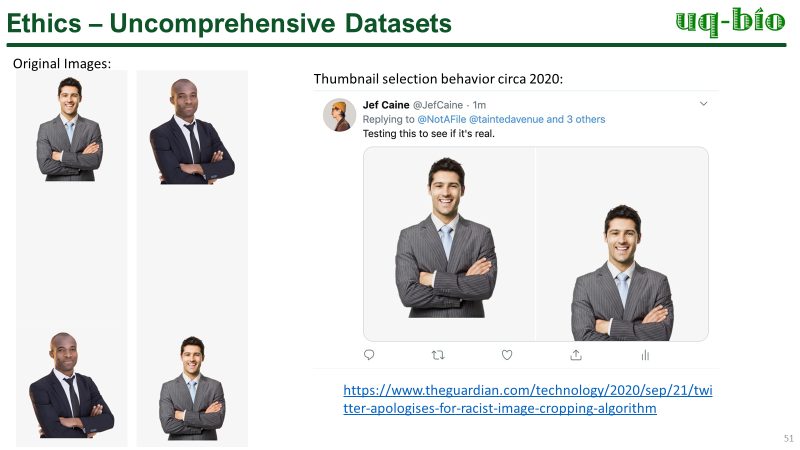

#### **Legal Gray Areas**

* Liability

  * Outcomes of machine learning models are a legal gray area in many countries. If a fully autonomous self driving car strikes a person or property, who is liable for damages? Is the car manufacturer negligent for all edge cases that an AI may encounter?

* Consent
  * Data privacy is a developing area of law, the [US currently as of 2022 has no federal guideline for personal data protections](https://www.nytimes.com/wirecutter/blog/state-of-privacy-laws-in-us/). Instead, America has specific laws like COPPA or HIPPA for specific data (children's data / healthcare data respectively for those two). This means actors in America are free to mostly build datasets without the consent of the people who generate that data. This is an ethical concern to right to privacy advocates since, often, even with anonymizing and barcoding, [entries can easily be tied to individuals.](https://techcrunch.com/2019/07/24/researchers-spotlight-the-lie-of-anonymous-data/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKfGXHUjL3AH6xAdh-MDG-eMsxVnFxbLsVNHXfqNx75V9VBzsfvnt7_QrgZqn1gatfLq2OXKPkPYlZfpTQD21UjDxx7FsPkq1vHLNSJSq6JhOb5hnQhBkIFe_mKtQY_b2F32T4Ke6ydgA0KBAd-0w3m0NvnujlBr0e1gEgm1-JJ9)

* Copyright
  * When training models on copyrighted works, such as artwork or written works, are the works produced by the ML model subject to copyright or derivatives? What if an ML model overfits one particular artist's work or style, such that it is reproducing works with 99.9% accuracy?


-------


Further Reading on Ethics in Machine Learning:
<details>
  <summary>Click to Expand</summary>


----------------------------

Academic Papers:

* [Ethical principles in machine learning and artificial intelligence: cases from the field and possible ways forward](https://www.nature.com/articles/s41599-020-0501-9) - Overview and introduction to ML ethics with 2 case studies - Piano S. (Nature 2020)

* [The global landscape of AI ethics guidelines](https://www.nature.com/articles/s42256-019-0088-2) - Jobin et al. (Nature Machine Intelligence 2019) - Scoping review about the state of AI ethics.


* [The Ethics of AI Ethics: An Evaluation of Guidelines](https://link.springer.com/article/10.1007/s11023-020-09517-8) - Hagendorff (Minds and Machines 2020) - Article and systemic review about areas lacking in recent AI industry guidelines.

Academic Papers w/ focus on Medicinal practice:

* [Implementing Machine Learning in Health Care — Addressing Ethical Challenges](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5962261/) - Char et al. (The New England Journal of Medicine 2019)

* [On the ethics of algorithmic decision-making in healthcare](https://jme.bmj.com/content/46/3/205) - Grote et al (Journal of Medical Ethics 2019)

Industry White Papers:

* [How to Prevent Discriminatory Outcomes in Machine Learning](https://www3.weforum.org/docs/WEF_40065_White_Paper_How_to_Prevent_Discriminatory_Outcomes_in_Machine_Learning.pdf) - World Economic Forum white paper (2019)

* [The Malicious Use of Artificial Intelligence: Forcasting, Prevention, and Mitigation](https://arxiv.org/ftp/arxiv/papers/1802/1802.07228.pdf) - Future of Humanity Institute (2018)

</details>

## Questions and Discussion
Learn more by exploring some of these questions on your own.  Feel free to use online resources or to ask a Large Language Model for more information.

## Easy Questions:

* Which type of machine learning returns out a continuous value output to match or predict something like a price?

* What is the difference between one-hot encoding and a label?

* What would you call a dataset where the features are not related to each other, i.e., you could shuffle the columns and have the same dataset?

* What is the difference between validation and cross validation?

* What is happening when you have very good accuracy on your training set but terrible accuracy on your validation set?

* What is happening when you have low model variance but high bias?

## Harder Questions:

* What final layer assumes the output labels are distinct, independent possibilities and will convert an activation to an independent probability across classes (output may not sum to 1)?

* What final layer assumes the output labels are concomitant possibilities and will convert an activation to joint probability across all classes (output sums to 1)?

* How would you train on a dataset that has overlapping labels? For example, imagine a dataset of shapes where your labels are [ circle, oval, rectangle, square], and some entries may have the one-hot label [1,1,0,0] for a perfect circle, while an oval will only have [0,1,0,0].

## Discussion Questions

* What do you do if you have no negative labels?

* What are some areas of ethical concern within your discipline using AI?

* What are some of your favorite ML models out there?

## Bonus questions (derivations):

* Derive the equation we use for solving directly for the linear regression weights that minimize the sum of squared errors.

\begin{equation}
W = (\bar{X}^T\cdot \bar{X})^{-1}\bar{X}^T \cdot \bar{Y} = pseudoinverse(\bar{X})*\bar{Y}
\end{equation}

starting from the formulation:
$
\begin{align}
\bar{Y} = W\cdot\bar{X}
\end{align}
$
\begin{align}
\mathbf{\bar{Y}} = \begin{bmatrix}
y_1&\\
y_2&\\
\vdots&\\
y_n&\\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_1&\\
w_2&\\
\vdots&\\
w_n&\\
\end{bmatrix}
\mathbf{\bar{X}} = \begin{bmatrix}
x_{1,1}& x_{1,2} &\cdots& x_{1,i}\\
x_{2,1}& \ddots & &\vdots&\\
\vdots& & \ddots&\\
x_{n,1}& \cdots& & x_{n,i}\\
\end{bmatrix}
\end{align}


for $n$ observations of $i$ features.

<details>
  <summary>HINT</summary>
 Write out the formula for the error between prediction (Y_hat) and the real value (Y_bar) and minimize the gradient of that formula.
<details>